## Black Friday Sales Analysis Using Python

So first we will import libaries needed for analysis and visulaization 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading the Black Friday Sales Dataset

In [2]:
df = pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Data Understanding

In [3]:
df.shape

(537577, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


As we can see we have so many null values in Product_Category_2 & Product_Category_3 so we will try to delete the whole column

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df['Product_Category_2'].isnull().sum()/len(df)*100

31.06271287648095

As we can see the % of missing values in the column is 31% 

In [7]:
del df['Product_Category_2']
del df['Product_Category_3']

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Data Preprocessing & Analyzing

Here we are checking for all the unique categories in each column of dataset

In [9]:
for col_name in df:
    print(col_name ,':', df[col_name].unique())

User_ID : [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender : ['F' 'M']
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation : [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category : ['A' 'C' 'B']
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']
Marital_Status : [0 1]
Product_Category_1 : [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]
Purchase : [ 8370 15200  1422 ... 14539 11120 18426]


In [10]:
print("Total Amount generated in Black Friday Sales is",df['Purchase'].sum() ,"(5 Billion)")

Total Amount generated in Black Friday Sales is 5017668378 (5 Billion)


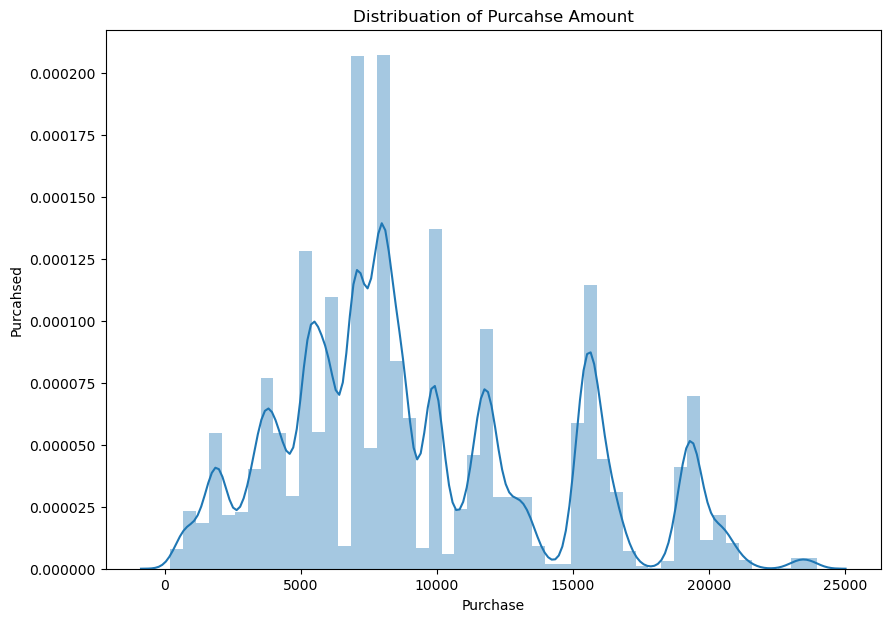

In [40]:
# Plot a histogram
plt.figure(figsize=(10,7))
sns.distplot(df['Purchase'])
plt.ylabel('Purcahsed')
plt.title('Distribuation of Purcahse Amount')
plt.show()

- The Distribution of Purchase Amount and we see most the products purchase amount is in range between 5k-10k

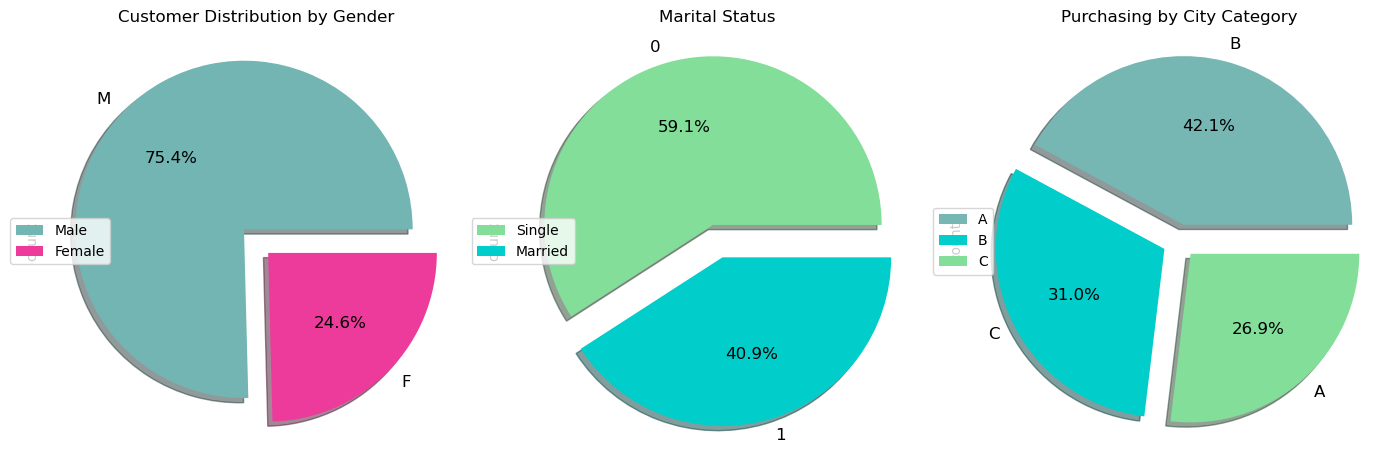

In [19]:
fig, axes = plt.subplots(1,3)
 
g1= df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")
g1.legend(['Male', 'Female'], loc='center left', bbox_to_anchor=(-0.1, 0.5))
 
g2= df['Marital_Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Marital Status")
g2.legend(['Single', 'Married'], loc='center left', bbox_to_anchor=(-0.1, 0.5))
 
g3= df['City_Category'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB","#82DE99"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Purchasing by City Category")
g3.legend(['A', 'B', 'C'], loc='center left', bbox_to_anchor=(-0.1, 0.5))

fig.set_size_inches(14,5)


 
plt.tight_layout()
 
plt.show()

- From the above chart, we can analyze that 75% of the purchases from the Black Friday sales were made by males, while 25% were made by females. 

- Based on the above chart, we can analyze that 59% of the purchases from the Black Friday sales were made by single individuals, while 40% of the purchases were made by married individuals.

- City B has a relatively high purchasing power, accounting for approximately 42% of the total.

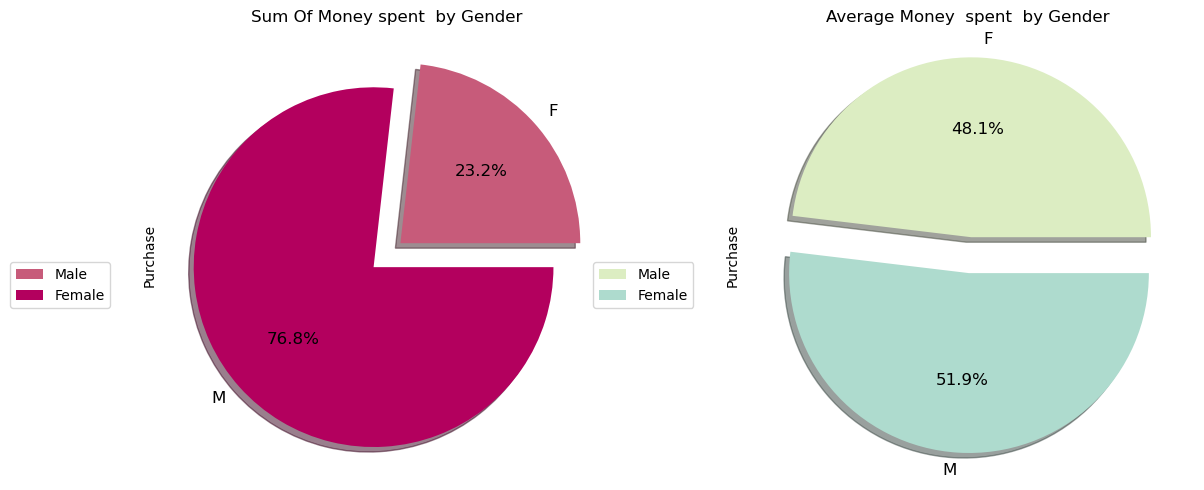

In [20]:
fig, axes = plt.subplots(1,2)
 
g1= df.groupby('Gender')['Purchase'].sum().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#C75B7A","#B3005E"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Sum Of Money spent  by Gender")
g1.legend(['Male', 'Female'], loc='upper right', bbox_to_anchor=(-0.1, 0.5))

 
g2= df.groupby('Gender')['Purchase'].mean().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#DCEDC2","#AEDBCE"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Average Money  spent  by Gender ")
g2.legend(['Male', 'Female'], loc='upper right', bbox_to_anchor=(-0.1, 0.5))
 
 
fig.set_size_inches(12,5)
 
plt.tight_layout() 
plt.show()

- Here we analyzed that Male are spending 76% from the Total Sales whereas Female spends 23%

- The average money spent by males and females is almost evenly split, with males accounting for 52% and females 48% of the total spending.

In [21]:
df.groupby(['Age'])['User_ID'].count()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: User_ID, dtype: int64

In [38]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

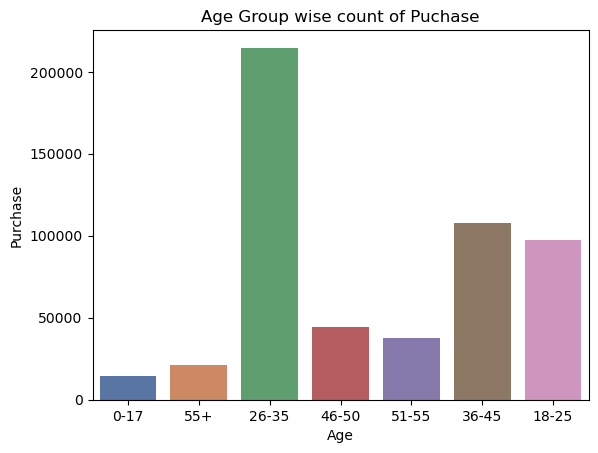

In [22]:
sns.countplot(data=df ,x='Age',palette='deep')
plt.title('Age Group wise count of Puchase')
plt.ylabel('Purchase')
plt.show()

- The analysis indicates that the majority of products purchased during the Black Friday sales were from individuals aged 26-35, accounting for 214,690 units or 40% of the total. In contrast, the least purchases were made by individuals in the age groups 0-17 and 55+.

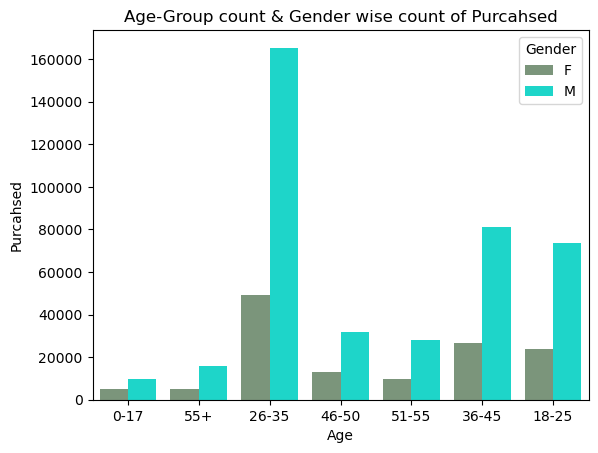

In [23]:
custom_palette = ['#779977', '#00F3E4']
sns.countplot(x='Age' , hue='Gender', data=df,palette=custom_palette)
plt.title('Age-Group count & Gender wise count of Purcahsed')
plt.ylabel('Purcahsed')
plt.show()

- Here, we can observe that, of the 214690 purchases made by individuals in the age category of 26 to 35, approximately 165342 are made by Male.

In [210]:
df1 = df.Occupation.value_counts().reset_index()
df2= df1.rename(columns={'count':"Occ_Counts"})

print(df2.sort_values(by = 'Occ_Counts',ascending=False))

Index(['Occupation', 'Occ_Counts'], dtype='object')
    Occupation  Occ_Counts
0            4       70862
1            0       68120
2            7       57806
3            1       45971
4           17       39090
5           20       32910
6           12       30423
7           14       26712
8            2       25845
9           16       24790
10           6       19822
11           3       17366
12          10       12623
13           5       11985
14          15       11812
15          11       11338
16          19        8352
17          13        7548
18          18        6525
19           9        6153
20           8        1524


In [212]:
df3 = df2.loc[df2['Occ_Counts']>7000]
other =  df2.loc[df2['Occ_Counts']<7000].sum()
other

Occupation       35
Occ_Counts    14202
dtype: int64

In [213]:
#created an other row in occupation for value counts of occupation less than 7k
other_df = pd.DataFrame({'Occupation': ['other'], 'Occ_Counts': [other.Occ_Counts]})
other_df

,Occupation,Occ_Counts
0,other,14202


In [217]:
# conacting the new df and old df
final = pd.concat([df3,other_df],ignore_index=True)

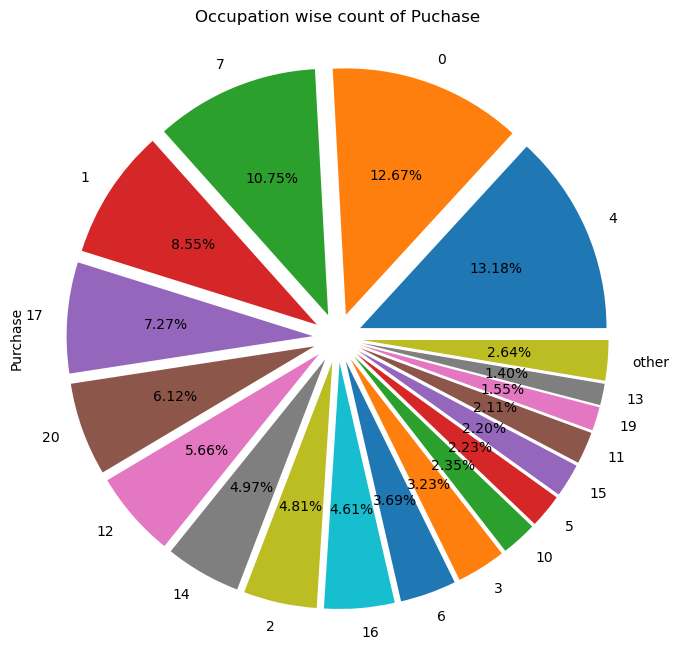

In [218]:
plt.figure(figsize=(12,8))
final['Occ_Counts'].plot(kind='pie',labels=final['Occupation'],autopct="%1.2f%%",explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
                                                             ,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
# df['Occupation'].value_counts(normalize=True).plot(kind='pie',autopct="%1.2f%%")
plt.title('Occupation wise count of Puchase')
plt.ylabel('Purchase')
plt.show()

- Occupation 8,9,18 as grouped as others has extremely little purchasing power, while occupations 4 and 0 have significant purchasing power.

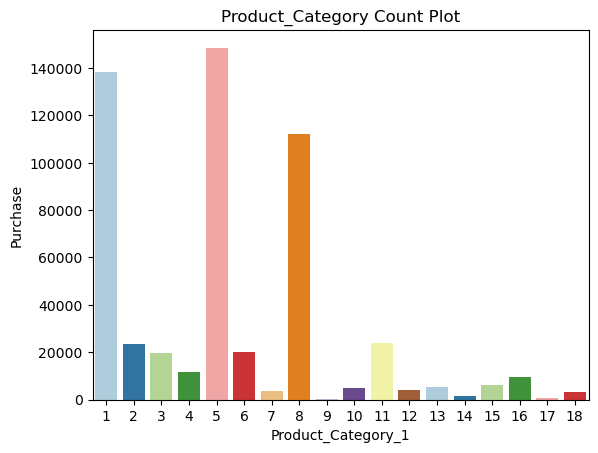

In [25]:
sns.countplot(x = 'Product_Category_1', data = df,palette="Paired")
plt.title('Product_Category Count Plot')
plt.ylabel('Purchase')
plt.show()

- Here, we can see that Product Categories 5, 1, and 8 are the most purchased.

### END